In [1]:
from pynq import Overlay

In [2]:
ol = Overlay("fourwing.bit")

In [3]:
ol?

In [4]:
fourwing = ol.fwheun_0

In [5]:
def binary_to_float(val):
    return float(val-(2**32)*int(str((val)>>(32-1))))/(2**24)   

In [43]:
binary_to_float(2**31+2**30)

-64.0

In [7]:
int(1*(2**24))

16777216

In [8]:
%%time

import time

x = 16777216
y = 16777216
z = 16777216
xvalshw = []
yvalshw = []
zvalshw = []
for i in range(150000):
    fourwing.write(0x08, x)
    fourwing.write(0x04, y)
    fourwing.write(0x00, z)
    xnewbin = fourwing.read(0x0C)
    ynewbin = fourwing.read(0x10)
    znewbin = fourwing.read(0x14)
    xvalshw.append(binary_to_float(xnewbin))
    yvalshw.append(binary_to_float(ynewbin))
    zvalshw.append(binary_to_float(znewbin))
    x = xnewbin
    y = ynewbin
    z = znewbin

CPU times: user 35.6 s, sys: 33.9 ms, total: 35.6 s
Wall time: 35.6 s


In [26]:
print(zvalshw)

[0.9840944409370422, 0.9928677678108215, 1.0060856938362122, 1.0408375263214111, 1.080222487449646, 1.1392930746078491, 1.2040693163871765, 1.287803292274475, 1.379112958908081, 1.4897184371948242, 1.6105965375900269, 1.7522335648536682, 1.907812237739563, 2.0869232416152954, 2.284901440143585, 2.510843813419342, 2.7623096704483032, 3.0484102368354797, 3.369178295135498, 3.7344242930412292, 4.147166311740875, 4.6188929080963135, 5.156363129615784, 5.768865883350372, 6.45354700088501, 7.212248623371124, 8.040091276168823, 8.934104323387146, 7.341196596622467, 10.501770734786987, 7.1174843311309814, 11.962813913822174, 7.276837527751923, 12.076251208782196, 7.515205264091492, 11.004895448684692, 7.610454618930817, 10.139365673065186, 7.629325091838837, 9.462012827396393, 7.627787172794342, 8.963759899139404, 7.650138795375824, 8.639876306056976, 7.730768084526062, 8.487386405467987, 7.895537257194519, 8.503210604190826, 8.162436962127686, 8.681992053985596, 8.538134455680847, 9.013613700

Text(0.5,0,'Z Axis')

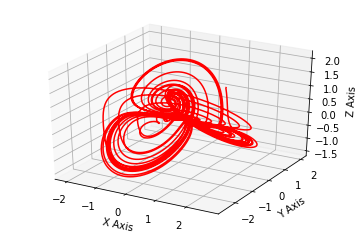

In [53]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xvals, yvals, zvals, 'red')
#ax.plot3D(xvalshw, yvalshw, zvalshw, 'blue')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
#ax.view_init(90,90)

In [49]:
sigma = 10
rho = 28
beta = 8/3
h = 0.01

def fx(x, y):
    return 0.2*x +y*z

def fy(x, y, z):
    return 0.01*x - 0.4*y - x*z

def fz(x, y, z):
    return -z - x*y

def k1(x, y):
    return fx(x, y)

def l1(x, y, z):
    return fy(x, y, z)

def m1(x, y, z):
    return fz(x, y, z)

def k2(x, y, z):
    return fx(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2)

def l2(x, y, z):
    return fy(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2, z + h * m1(x, y, z) / 2)

def m2(x, y, z):
    return fz(x + h * k1(x, y) / 2, y + h * l1(x, y, z) / 2, z + h * m1(x, y, z) / 2)

def k3(x, y, z):
    return fx(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2)

def l3(x, y, z):
    return fy(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2, z + h * m2(x, y, z) / 2)

def m3(x, y, z):
    return fz(x + h * k2(x, y, z) / 2, y + h * l2(x, y, z) / 2, z + h * m2(x, y, z) / 2)

def k4(x, y, z):
    return fx(x + h * k3(x, y, z), y + h * l3(x, y, z))

def l4(x, y, z):
    return fy(x + h * k3(x, y, z), y + h * l3(x, y, z), z + h * m3(x, y, z))

def m4(x, y, z):
    return fz(x + h * k3(x, y, z), y + h * l3(x, y, z), z + h * m3(x, y, z))

def rk4(x, y, z):
    return x + h * (k1(x, y) + 2 * k2(x, y, z) + 2 * k3(x, y, z) + k4(x, y, z)) / 6, y + h * (l1(x, y, z) + 2 * l2(x, y, z) + 2 * l3(x, y, z) + l4(x, y, z)) / 6, z + h * (m1(x, y, z) + 2 * m2(x, y, z) + 2 * m3(x, y, z) + m4(x, y, z)) / 6

In [18]:
#Heun's Method

def heun(x, y, z):
    return x + h * (k1(x, y) + k2(x, y, z)) / 2, y + h * (l1(x, y, z) + l2(x, y, z)) / 2, z + h * (m1(x, y, z) + m2(x, y, z)) / 2


In [52]:
%%time

xn = 1
yn = 1
zn = 1
xvals = []
yvals = []
zvals = []

for i in range(100000):
        xvals.append(xn)
        yvals.append(yn)
        zvals.append(zn)
        x, y, z = rk4(xn, yn, zn)
        xn, yn, zn = x, y, z

CPU times: user 1min, sys: 0 ns, total: 1min
Wall time: 1min
